## Visualising high dimensional data

- t-SNE
- t-Distributed Stochastic Neigbour Embedding

In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from utils import setup_project_root

setup_project_root()

# soldiers = pd.read_excel(r"C:\Users\Xps\Documents\Tutor\Python\Machine Learning - Preprocessing\PCA Advanced\ansur.xlsx")
soldiers = pd.read_excel("data/ansur.xlsx")
soldiers


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
6064,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
6065,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
6066,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal


In [6]:
from sklearn.manifold import TSNE
numericals = soldiers.select_dtypes(include='number')

model=TSNE(learning_rate=50)

## fit the data
tsne_features = model.fit_transform(numericals)

soldiers['tsne-x'] = tsne_features[:,0]
soldiers['tsne-y'] = tsne_features[:,1]

In [7]:
numericals.shape

(6068, 94)

<Axes: xlabel='tsne-x', ylabel='tsne-y'>

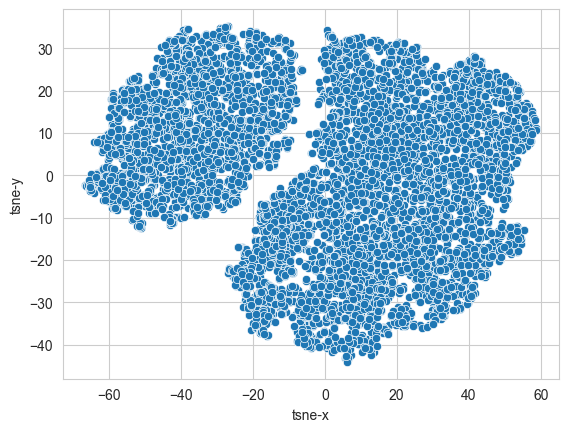

In [8]:
import seaborn as sns
sns.scatterplot(x='tsne-x', y='tsne-y', data=soldiers)

## Looking at drivers

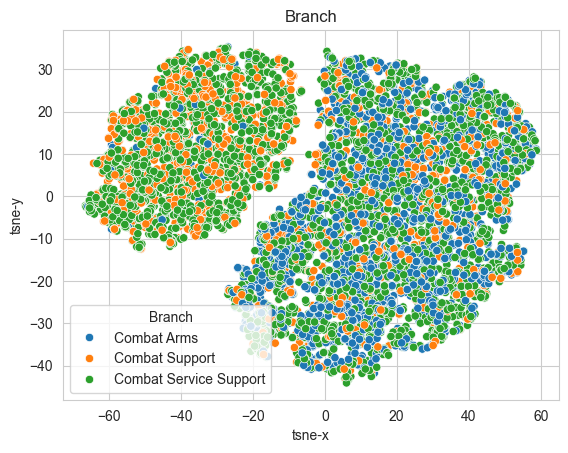

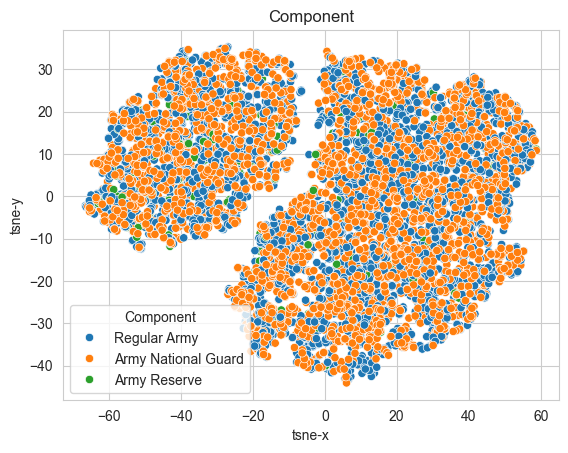

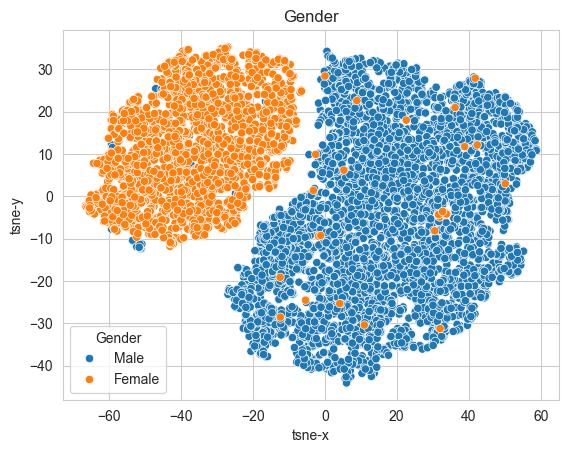

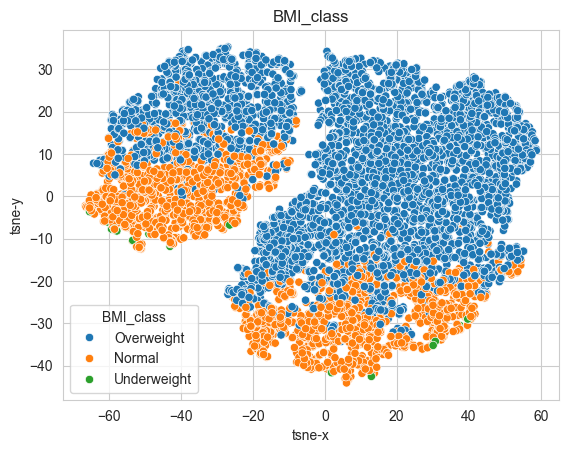

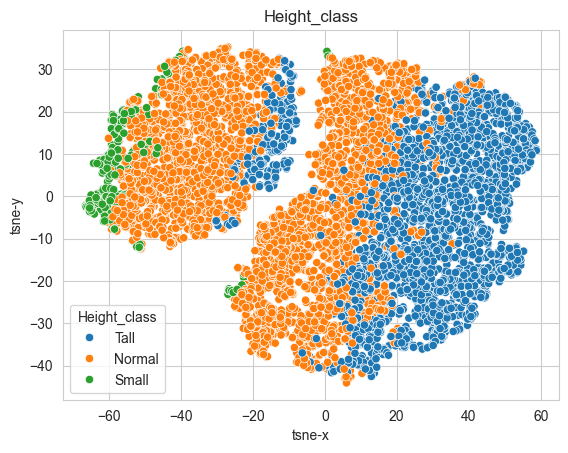

In [9]:
for x in soldiers.select_dtypes(include='object').columns:
    sns.scatterplot(x='tsne-x', y='tsne-y', data=soldiers, hue=x)
    plt.title(f'{x}')
    plt.show()


In [10]:
soldiers.drop(['tsne-x', 'tsne-y'], axis=1)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
6064,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
6065,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
6066,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal


## Key Limitations to Keep in Mind (Generated by AI)
While useful, t-SNE has distinct characteristics you should be aware of:
- It is not for dimensionality reduction for training models: Unlike PCA (Principal Component Analysis), t-SNE does not produce a function to map new data points. It is purely for visualization of the current dataset. You cannot feed new samples into an existing t-SNE plot.
- Distance Interpretation: While t-SNE preserves local clusters well, the global distances (distances between far-apart clusters) are not always meaningful.
- Computationally Expensive: It scales quadratically with the number of samples (N^2), making it slow for very large datasets compared to PCA.